In [1]:
import pandas as pd
import os
import geopandas as gpd

C:\Users\ajimp\AppData\Roaming\Python\Python38\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-1-bb86c12c1256>:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migratio

#### [SINGULAR HORIZENTAL BAR CHART: Binning for monthly and quarterly fire incidents per grid and month]

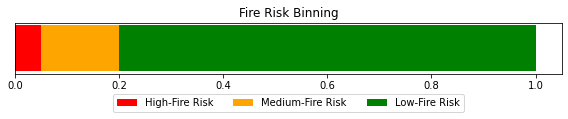

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define binning and labels
bins = [0, 0.05, 0.2, 1]
labels = ['High-Fire Risk', 'Medium-Fire Risk', 'Low-Fire Risk']

# Define data for the stacked bar chart
data = [0.05, 0.15, 0.8]

# Define colors for each bin/label
colors = ['red', 'orange', 'green']

# Create horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(y=0, width=data[0], color=colors[0], label=labels[0], edgecolor='none')
ax.barh(y=0, left=data[0], width=data[1],
        color=colors[1], label=labels[1], edgecolor='none')
ax.barh(y=0, left=data[0] + data[1], width=data[2],
        color=colors[2], label=labels[2], edgecolor='none')

# Set chart title and axis labels
plt.title('Fire Risk Binning')
plt.yticks([])

# Add legend below x-axis label
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Adjust spacing and display the chart
plt.tight_layout()
plt.show();

In [3]:
# File Output
binning_file_name = 'binning_curve.png'
binning_file_path = 'Data/Data_visualization_folders/feature_engineering/' + \
    binning_file_name
if os.path.exists(binning_file_name):
    os.remove(binning_file_name)
    # Save the plot to a file
    fig.savefig(binning_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(binning_file_path, dpi=300, bbox_inches='tight')


#### [MAP (HEATMAP): Mode fire-risk level per grid & month]

In [4]:
gdf = gpd.read_file('Data/Generated_grids/square_grids1000.shp')

In [5]:
df_fe_combined_modified = pd.read_csv('Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)

In [6]:
# Group by grid and calculate mode of fire level
df_mode_fire_level = df_fe_combined_modified.groupby('1000_GRID_ID')['FIRE_RISK'].apply(
    lambda x: x.mode()[0]).rename('MODE_FIRE_RISK').reset_index()

In [7]:
df_mode_fire_level.describe(include='all')

,1000_GRID_ID,MODE_FIRE_RISK
count,714,714
unique,714,3
top,PAqV45dPSFI=,2-Low Fire-Risk
freq,1,654


In [8]:
merged_df_mode_fire_level = gdf.merge(df_mode_fire_level,
                                           left_on='grid_id', right_on='1000_GRID_ID')

In [9]:
merged_df_mode_fire_level.to_file('Data/Data_visualization_folders/feature_engineering/merged_mode_fire_risk_level_per_grid.shp',
                                       driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-9-c1523c696f5f>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_mode_fire_level.to_file('Data/Data_visualization_folders/feature_engineering/merged_mode_fire_risk_level_per_grid.shp',
